In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def extract_number(filename: str) -> str:
    """
    Extracts the numeric part after the last underscore in the filename.
    If no number is found, returns '0'.
    
    Args:
        filename (str): The filename to process.
        
    Returns:
        str: The extracted number or '0' if not found.
    """
    pattern = r'_(\d+)(?:\.\w+)?$'
    match = re.search(pattern, filename)
    return match.group(1) if match else '0'


def load_csv_files(directory: str, keyword: str) -> pd.DataFrame:
    """
    Loads CSV files from a given directory that contain the specified keyword.
    Adds a 'filename' column to each DataFrame and concatenates them.
    
    Args:
        directory (str): Path to the folder containing CSV files.
        keyword (str): Keyword to filter filenames.
        
    Returns:
        pd.DataFrame: A single DataFrame with data from all CSV files.
    """
    files = [f for f in os.listdir(directory) if keyword in f and f.endswith(".csv")]
    dataframes = []
    
    for file in files:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)
        df["filename"] = file
        dataframes.append(df)
    
    combined_df = pd.concat(dataframes, ignore_index=True)
    
    # Drop the "Unnamed: 0" column if it exists
    if "Unnamed: 0" in combined_df.columns:
        combined_df.drop("Unnamed: 0", axis=1, inplace=True)
    
    return combined_df


def compute_results(df: pd.DataFrame) -> pd.DataFrame:
    """
    Computes the mean of 'structure' and 'accuracy' (scaled by 100) for each unique file,
    and extracts the number of samples from the filename.
    
    Args:
        df (pd.DataFrame): The unified DataFrame.
        
    Returns:
        pd.DataFrame: A DataFrame containing computed results, sorted by n_samples.
    """
    results = []
    
    for filename in df["filename"].unique():
        mask = df["filename"] == filename
        ratios = df.loc[mask, ["structure", "accuracy"]].mean() * 100
        ratios["n_samples"] = int(extract_number(filename))
        results.append(ratios)
    
    results_df = pd.DataFrame(results)
    results_df.sort_values("n_samples", ascending=True, inplace=True)
    return results_df


def plot_accuracy(results_df: pd.DataFrame) -> None:
    """
    Plots a bar chart of accuracy values according to the number of samples.
    
    Args:
        results_df (pd.DataFrame): DataFrame with 'n_samples' and 'accuracy' columns.
    """
    plt.figure(figsize=(8, 5))
    bars = plt.bar(results_df['n_samples'].astype(str), results_df['accuracy'], color='blue')
    
    plt.xlabel('Number of Samples (n_samples)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy Level According to n_samples')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add percentage label on each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height / 2,
            f"{height:.2f}%",
            ha='center',
            va='center',
            color='white',
            fontsize=10,
            fontweight='bold'
        )
    
    plt.show()


In [3]:
directory = "./test"
keyword = "gemma3"

combined_df = load_csv_files(directory, keyword)
combined_df.head()  



,structure,accuracy,filename
0,False,True,gemma3_1b.csv
1,False,True,gemma3_1b.csv
2,False,True,gemma3_1b.csv
3,False,False,gemma3_1b.csv
4,False,True,gemma3_1b.csv


In [4]:
directory = "./test"
keyword = "gemma3"

combined_df = load_csv_files(directory, keyword)
combined_df.head()  # Optional: Display the first few rows to check the data


,structure,accuracy,filename
0,False,True,gemma3_1b.csv
1,False,True,gemma3_1b.csv
2,False,True,gemma3_1b.csv
3,False,False,gemma3_1b.csv
4,False,True,gemma3_1b.csv


In [7]:
results_df = compute_results(combined_df)
results_df  # Display the computed results



,structure,accuracy,n_samples
0,2.4,74.7,0.0
1,73.5,62.9,100.0
4,100.0,85.6,500.0
2,100.0,80.5,1000.0
3,100.0,86.0,2500.0
5,100.0,87.0,5000.0


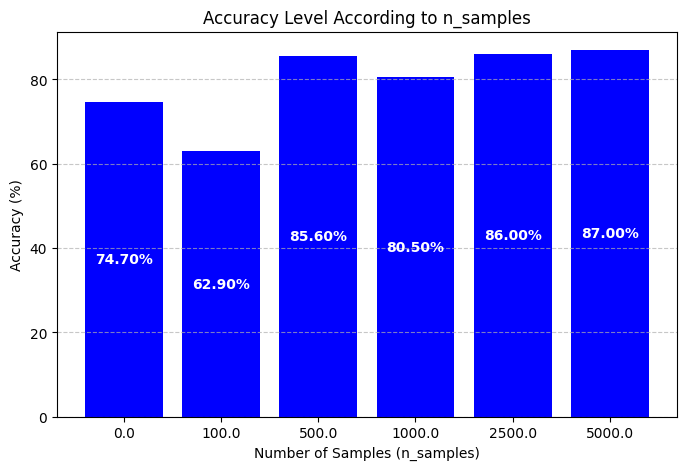

In [8]:
plot_accuracy(results_df)
